In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
with open('teste3_d_200ksomado.txt') as f:
    lines = f.readlines()

In [51]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

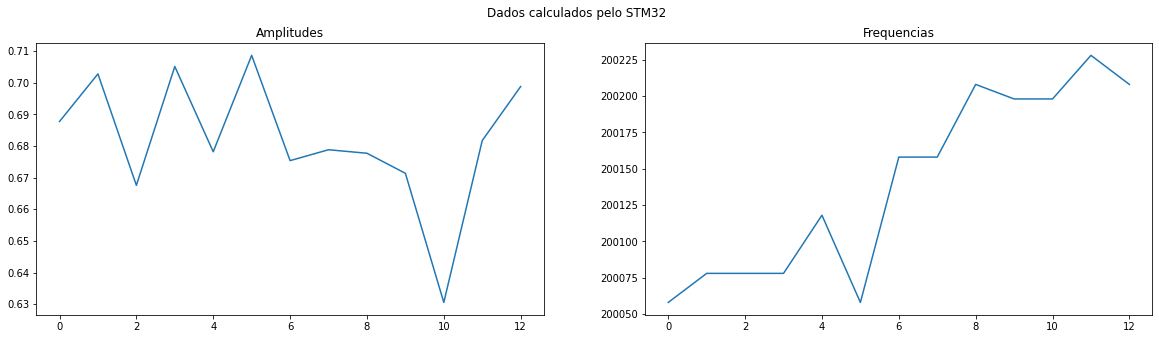

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [53]:
dados.shape

(13, 600)

In [54]:
linha = 1

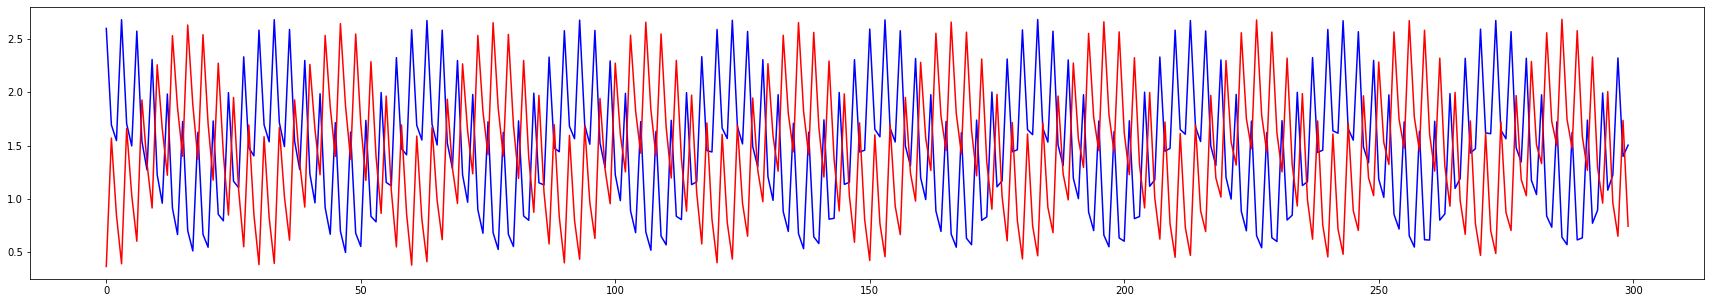

In [55]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[0,:limite-300]*k,'b-')
plt.plot(dados[1,:limite-300]*k,'r-')
plt.show()

In [56]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [57]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [58]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

df = 2000.0


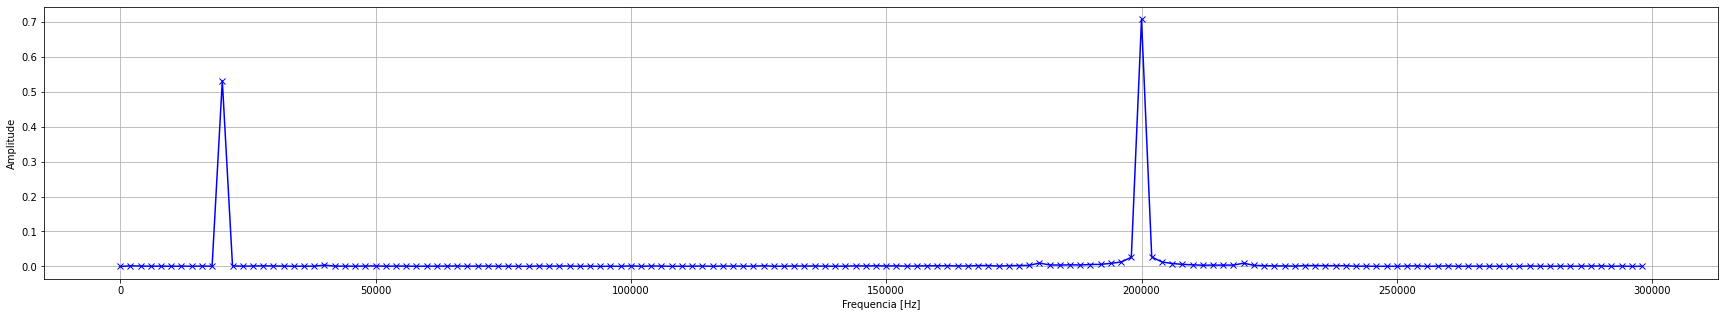

In [59]:
npontos = 300
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

df = 1000.0


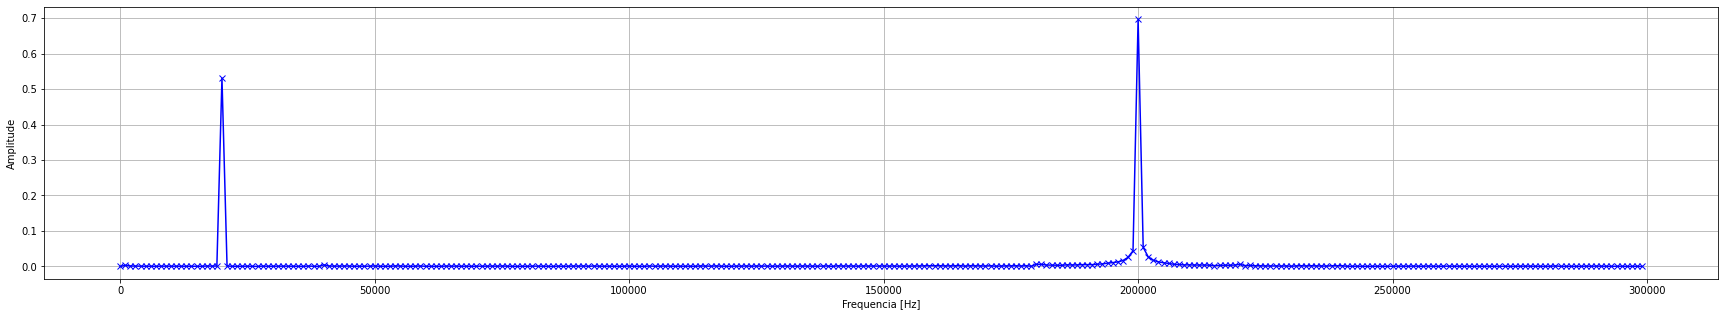

In [60]:
npontos = 600
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

In [71]:
frequencia = 200000
sample_freq = 600000
npontos_range = range(30,600,30)
componentes = [componente_precisa((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,
                                  frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

Text(0, 0.5, 'Componente em f=200000Hz')

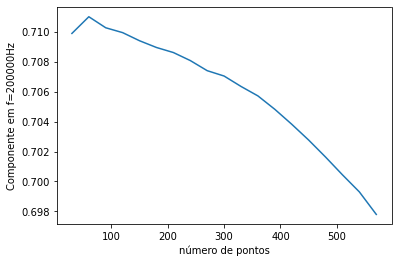

In [72]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [73]:
frequencia = 20000
sample_freq = 600000
npontos = 300
inicio_range = range(0,600-npontos-1,10)
componentes = [componente_precisa((dados[linha,inicio:inicio+npontos]-np.mean(dados[linha,inicio:inicio+npontos]))*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

Text(0, 0.5, 'Componente em f=20000Hz')

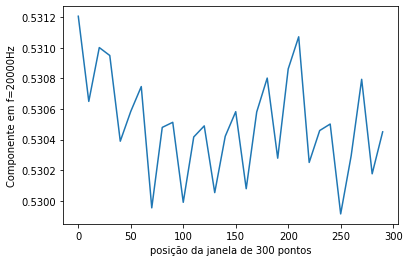

In [74]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [75]:
frequencia_range = range(17000,21000,1)
sample_freq = 600000
inicio_pontos = 0
npontos = 300
componentes = [componente_precisa((dados[linha,inicio_pontos:inicio_pontos+npontos]-
                                   np.mean(dados[linha,inicio_pontos:inicio_pontos+npontos]))*k,
                                  frequencia_i,sample_freq, fator_zeros=100000) 
               for frequencia_i in frequencia_range]

In [76]:
frequencia_range2 = range(17000,21000,1)
sample_freq = 600000
npontos2 = 600
componentes2 = [componente_precisa((dados[linha,:npontos2]-np.mean(dados[linha,:npontos2]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range2]

In [77]:
idx_pico = np.argmax(componentes)
print(idx_pico)

3017


In [78]:
# olhando 300 pontos
for pontos in range(0,100,5):
    erro_perc = ((componentes[idx_pico]-componentes[idx_pico-pontos])/componentes[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 5Hz	Erro: 0.0011503825115814585%
dif freq: 10Hz	Erro: 0.0043648595689660796%
dif freq: 15Hz	Erro: 0.009643112524922741%
dif freq: 20Hz	Erro: 0.016984746056240535%
dif freq: 25Hz	Erro: 0.026389288189934218%
dif freq: 30Hz	Erro: 0.037856190332960456%
dif freq: 35Hz	Erro: 0.05138482730609262%
dif freq: 40Hz	Erro: 0.06697449737986451%
dif freq: 45Hz	Erro: 0.0846244223153622%
dif freq: 50Hz	Erro: 0.10433374740731474%
dif freq: 55Hz	Erro: 0.12610154153138506%
dif freq: 60Hz	Erro: 0.14992679719384344%
dif freq: 65Hz	Erro: 0.17580843058569187%
dif freq: 70Hz	Erro: 0.20374528163950534%
dif freq: 75Hz	Erro: 0.23373611408980458%
dif freq: 80Hz	Erro: 0.26577961553689794%
dif freq: 85Hz	Erro: 0.299874397513628%
dif freq: 90Hz	Erro: 0.33601899555646475%
dif freq: 95Hz	Erro: 0.3742118692786678%


In [79]:
# olhando 600 pontos
idx_pico2 = np.argmax(componentes2)
for pontos in range(0,40,2):
    erro_perc = ((componentes2[idx_pico2]-componentes2[idx_pico2-pontos])/componentes[idx_pico2])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 2Hz	Erro: 0.0008786782383134081%
dif freq: 4Hz	Erro: 0.003076377590806308%
dif freq: 6Hz	Erro: 0.006592989018561023%
dif freq: 8Hz	Erro: 0.011428372153721708%
dif freq: 10Hz	Erro: 0.017582355304593653%
dif freq: 12Hz	Erro: 0.025054735460972477%
dif freq: 14Hz	Erro: 0.0338452783033814%
dif freq: 16Hz	Erro: 0.043953718209842424%
dif freq: 18Hz	Erro: 0.055379758265636105%
dif freq: 20Hz	Erro: 0.06812307027289408%
dif freq: 22Hz	Erro: 0.08218329476150824%
dif freq: 24Hz	Erro: 0.09756004100127288%
dif freq: 26Hz	Erro: 0.11425288701369263%
dif freq: 28Hz	Erro: 0.13226137958613082%
dif freq: 30Hz	Erro: 0.15158503428664769%
dif freq: 32Hz	Erro: 0.17222333547750093%
dif freq: 34Hz	Erro: 0.1941757363331397%
dif freq: 36Hz	Erro: 0.21744165885660996%
dif freq: 38Hz	Erro: 0.2420204938974022%


In [80]:
for idx,(c,f) in enumerate(zip(componentes,frequencia_range)):
    print(f'{idx}\t{c}\t{f}')

0	0.10794929853396326	17000
1	0.10798662223025789	17001
2	0.10802370624155348	17002
3	0.10806055031419987	17003
4	0.10809715419486203	17004
5	0.10813351763052033	17005
6	0.1081696403684721	17006
7	0.10820552215633103	17007
8	0.10824116274202955	17008
9	0.10827656187381712	17009
10	0.10831171930026282	17010
11	0.10834663477025482	17011
12	0.1083813080330012	17012
13	0.10841573883803046	17013
14	0.10844992693519245	17014
15	0.10848387207465929	17015
16	0.108517574006924	17016
17	0.10855103248280358	17017
18	0.10858424725343854	17018
19	0.10861721807029218	17019
20	0.1086499446851536	17020
21	0.10868242685013717	17021
22	0.10871466431768219	17022
23	0.10874665684055482	17023
24	0.10877840417184838	17024
25	0.10880990606498266	17025
26	0.1088411622737065	17026
27	0.10887217255209725	17027
28	0.10890293665456141	17028
29	0.10893345433583475	17029
30	0.10896372535098406	17030
31	0.10899374945540685	17031
32	0.1090235264048322	17032
33	0.10905305595532115	17033
34	0.10908233786326806	17034
35

1500	0.15540311101064294	18500
1501	0.1557544804536166	18501
1502	0.1561059413733126	18502
1503	0.15645749332917055	18503
1504	0.1568091358803686	18504
1505	0.15716086858582046	18505
1506	0.1575126910041808	18506
1507	0.1578646026938436	18507
1508	0.15821660321294212	18508
1509	0.1585686921193517	18509
1510	0.15892086897068902	18510
1511	0.15927313332431217	18511
1512	0.15962548473732424	18512
1513	0.15997792276657008	18513
1514	0.16033044696864032	18514
1515	0.16068305689987056	18515
1516	0.1610357521163419	18516
1517	0.16138853217388213	18517
1518	0.16174139662806614	18518
1519	0.16209434503421702	18519
1520	0.16244737694740743	18520
1521	0.16280049192245752	18521
1522	0.1631536895139393	18522
1523	0.16350696927617434	18523
1524	0.16386033076323642	18524
1525	0.16421377352895153	18525
1526	0.1645672971268983	18526
1527	0.16492090111040889	18527
1528	0.16527458503257067	18528
1529	0.1656283484462244	18529
1530	0.165982190903969	18530
1531	0.166336111958157	18531
1532	0.166690111160900

1903	0.29942367428111166	18903
1904	0.29977417764536524	18904
1905	0.3001245817464541	18905
1906	0.3004748860994352	18906
1907	0.30082509021941706	18907
1908	0.3011751936215617	18908
1909	0.3015251958210831	18909
1910	0.30187509633325055	18910
1911	0.3022248946733869	18911
1912	0.30257459035687223	18912
1913	0.3029241828991417	18913
1914	0.3032736718156899	18914
1915	0.3036230566220677	18915
1916	0.30397233683388575	18916
1917	0.30432151196681523	18917
1918	0.3046705815365868	18918
1919	0.30501954505899365	18919
1920	0.3053684020498909	18920
1921	0.30571715202519684	18921
1922	0.30606579450089333	18922
1923	0.30641432899302906	18923
1924	0.3067627550177146	18924
1925	0.30711107209113125	18925
1926	0.3074592797295248	18926
1927	0.3078073774492094	18927
1928	0.3081553647665692	18928
1929	0.3085032411980575	18929
1930	0.3088510062601985	18930
1931	0.3091986594695872	18931
1932	0.3095462003428917	18932
1933	0.30989362839685186	18933
1934	0.31024094314828227	18934
1935	0.31058814411407315	1

3022	0.5312661633082002	20022
3023	0.5312638760426706	20023
3024	0.5312611500467971	20024
3025	0.531257985316168	20025
3026	0.5312543818470187	20026
3027	0.5312503396362438	20027
3028	0.5312458586813851	20028
3029	0.5312409389806386	20029
3030	0.5312355805328544	20030
3031	0.5312297833375308	20031
3032	0.5312235473948231	20032
3033	0.5312168727055361	20033
3034	0.5312097592711283	20034
3035	0.5312022070937097	20035
3036	0.5311942161760436	20036
3037	0.5311857865215466	20037
3038	0.5311769181342864	20038
3039	0.5311676110189837	20039
3040	0.5311578651810123	20040
3041	0.5311476806263964	20041
3042	0.531137057361816	20042
3043	0.5311259953946014	20043
3044	0.531114494732736	20044
3045	0.5311025553848563	20045
3046	0.53109017736025	20046
3047	0.531077360668859	20047
3048	0.5310641053212768	20048
3049	0.531050411328749	20049
3050	0.5310362787031747	20050
3051	0.5310217074571052	20051
3052	0.531006697603745	20052
3053	0.5309912491569483	20053
3054	0.5309753621312271	20054
3055	0.53095903654

3689	0.4372948021082436	20689
3690	0.43702996247729675	20690
3691	0.43676481788678434	20691
3692	0.4364993687171889	20692
3693	0.4362336153494199	20693
3694	0.4359675581648086	20694
3695	0.4357011975451108	20695
3696	0.4354345338725051	20696
3697	0.43516756752959185	20697
3698	0.4349002988993925	20698
3699	0.4346327283653499	20699
3700	0.43436485631132704	20700
3701	0.4340966831216056	20701
3702	0.433828209180887	20702
3703	0.43355943487429033	20703
3704	0.4332903605873515	20704
3705	0.433020986706024	20705
3706	0.4327513136166773	20706
3707	0.4324813417060967	20707
3708	0.43221107136148057	20708
3709	0.43194050297044373	20709
3710	0.4316696369210137	20710
3711	0.4313984736016286	20711
3712	0.431127013401142	20712
3713	0.4308552567088168	20713
3714	0.430583203914327	20714
3715	0.43031085540775726	20715
3716	0.43003821157960087	20716
3717	0.42976527282076027	20717
3718	0.42949203952254644	20718
3719	0.4292185120766764	20719
3720	0.42894469087527587	20720
3721	0.4286705763108741	20721
37

In [26]:
for idx,(c,f) in enumerate(zip(componentes2,frequencia_range2)):
    print(f'{idx}\t{c}\t{f}')

0	0.003381181603016374	17000
1	0.003235024181081503	17001
2	0.0030899564377829384	17002
3	0.002946159938415391	17003
4	0.002803851598754221	17004
5	0.0026632920888722193	17005
6	0.0025247964691059153	17006
7	0.002388747640686806	17007
8	0.002255613285473723	17008
9	0.002125967001423053	17009
10	0.002000514214014949	17010
11	0.0018801229684331019	17011
12	0.0017658585461869595	17012
13	0.0016590184741623354	17013
14	0.0015611602362725378	17014
15	0.0014741074329538144	17015
16	0.0013999121782603654	17016
17	0.0013407464485809348	17017
18	0.001298702137627327	17018
19	0.0012755095232039849	17019
20	0.0012722353845281366	17020
21	0.001289065652771504	17021
22	0.001325267070927978	17022
23	0.0013793457611797125	17023
24	0.0014493302911794128	17024
25	0.00153307007369741	17025
26	0.001628468550201491	17026
27	0.00173362414465603	17027
28	0.0018468911587192771	17028
29	0.001966887194166735	17029
30	0.0020924717802706734	17030
31	0.0022227132903265374	17031
32	0.0023568539618324218	17032
33	0

2175	0.09464929020627223	19175
2176	0.09530799060249867	19176
2177	0.0959673074405889	19177
2178	0.09662723727374826	19178
2179	0.09728777665682846	19179
2180	0.09794892214612623	19180
2181	0.09861067029918977	19181
2182	0.09927301767463147	19182
2183	0.09993596083195232	19183
2184	0.10059949633136668	19184
2185	0.10126362073364283	19185
2186	0.10192833059993936	19186
2187	0.10259362249165818	19187
2188	0.10325949297029706	19188
2189	0.10392593859730903	19189
2190	0.10459295593397039	19190
2191	0.10526054154124888	19191
2192	0.10592869197968198	19192
2193	0.10659740380925907	19193
2194	0.10726667358930342	19194
2195	0.10793649787836723	19195
2196	0.10860687323412258	19196
2197	0.10927779621326338	19197
2198	0.10994926337140672	19198
2199	0.11062127126300027	19199
2200	0.11129381644123365	19200
2201	0.11196689545795159	19201
2202	0.1126405048635727	19202
2203	0.11331464120700957	19203
2204	0.1139893010355956	19204
2205	0.11466448089500851	19205
2206	0.11534017732920437	19206
2207	0.1160

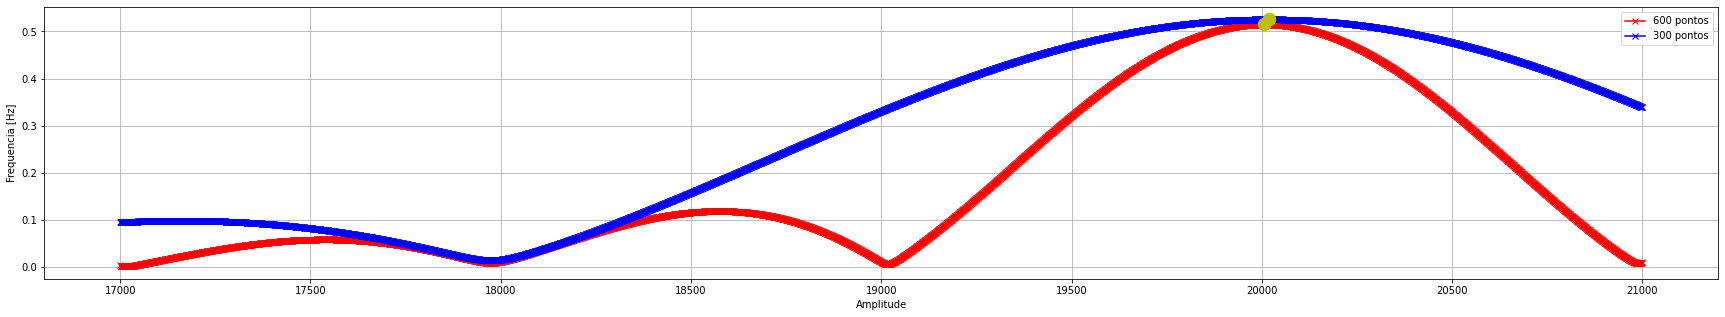

In [27]:
plt.figure(figsize=(30,5))
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.plot(frequencia_range2[idx_pico2], componentes2[idx_pico2], 'y.', markersize = 25)
plt.plot(frequencia_range[idx_pico], componentes[idx_pico], 'y.', markersize = 25)
plt.xlabel(f'Amplitude')
plt.ylabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

In [28]:
dados.shape[0]

12

In [29]:
frequencia = 20000
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 300
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	0.5274584883157141	20000	0.527455889698067	0.5274584883157141	0.5274177900455707
1	0.5254940058271788	20020	0.5254803956133193	0.5254940058271788	0.5254644052580001
2	0.5298408998729309	19970	0.5298108201366564	0.5298408998729309	0.5298273036757135
3	0.5330822030493302	20000	0.5330595400001668	0.5330822030493302	0.5330621046681218
4	0.5301459427319314	20030	0.5301421858508104	0.5301459427319314	0.5301056318404155
5	0.5218751497375304	20030	0.5218677299836618	0.5218751497375304	0.5218402285874629
6	0.5286393239650864	19970	0.5286091820058267	0.5286393239650864	0.5286259877778465
7	0.5296517624922431	20020	0.5296099415321265	0.5296517624922431	0.529649705976004
8	0.5241898566070329	20020	0.5241686299165867	0.5241898566070329	0.5241680557835928
9	0.5434648124387138	20000	0.5434643510557784	0.5434648124387138	0.5434211694571714
10	0.5264901214051508	20020	0.526471965178342	0.5264901214051508	0.5264652876932594
11	0.5288356425593375	20030	0.5288339601199242	0.5288356425593375	0.5287937860

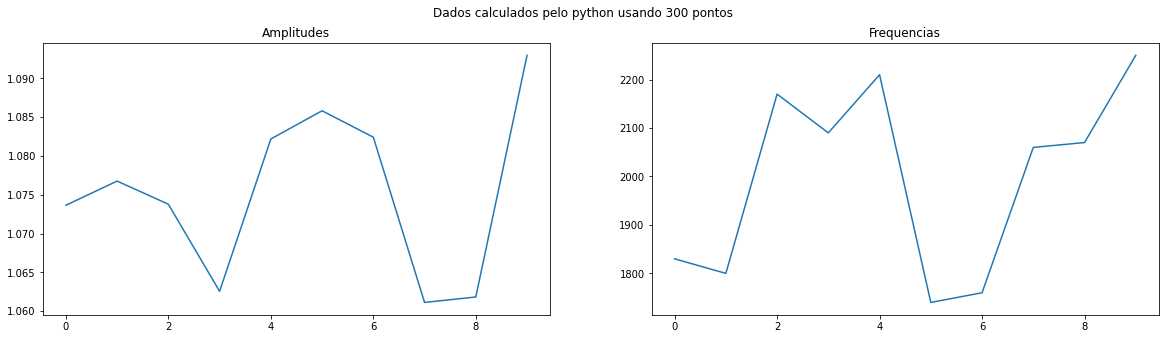

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos')
plt.show()

In [28]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0632199828344726	1960	1.0630007571494557	1.0632199828344726	1.0630988209454213
1	1.0639455818097412	1950	1.0636589369409033	1.0639455818097412	1.0638909503258742
2	1.063813609131325	2040	1.0634782287225626	1.063813609131325	1.0637920076158884
3	1.0609384187757305	2020	1.060728069045725	1.0609384187757305	1.0608011816290062
4	1.0657162097768502	2060	1.0656631893727824	1.0657162097768502	1.06540509364775
5	1.0657741576726762	1940	1.0655737896816029	1.0657741576726762	1.06563075352549
6	1.0648924990808002	1940	1.0645517534390891	1.0648924990808002	1.0648902628122567
7	1.0600947201611357	2010	1.0597882102864296	1.0600947201611357	1.0600562125621495
8	1.0603809645762399	2020	1.0603569618322837	1.0603809645762399	1.0600587399491392
9	1.0691711208660588	2070	1.0689675146714868	1.0691711208660588	1.0690019775991582


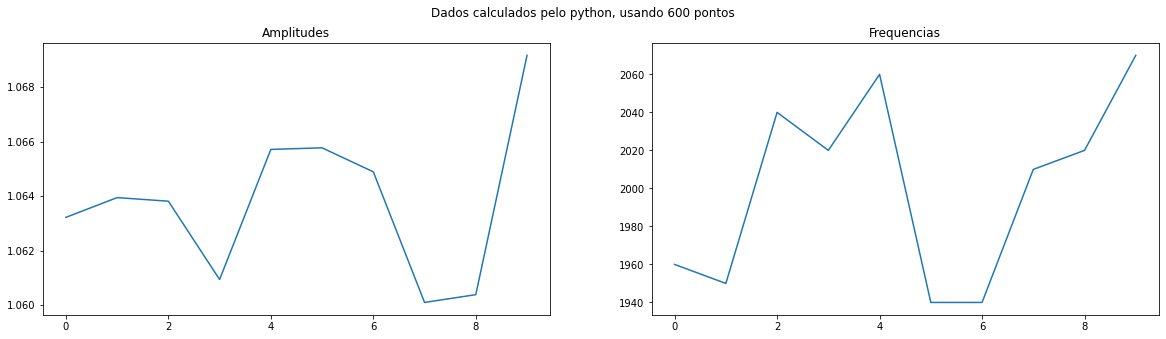

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 600 pontos')
plt.show()

In [30]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 300000
    componentes2 = [componente_precisa((dados[frame,:npontos2:2]-np.mean(dados[frame,:npontos2:2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.062851134819931	1960	1.0625869646901611	1.062851134819931	1.062775364524874
1	1.0646481700829205	1950	1.06440656226834	1.0646481700829205	1.0645481802581267
2	1.063555061209462	2040	1.063261252071284	1.063555061209462	1.0634924854432823
3	1.0608706703160662	2020	1.060710611559276	1.0608706703160662	1.0606837957764867
4	1.0650463308254148	2060	1.065037589787104	1.0650463308254148	1.064691699395525
5	1.0655231328340238	1940	1.0652827189096545	1.0655231328340238	1.0654198639679664
6	1.0651026836484094	1950	1.0650655495755816	1.0651026836484094	1.0647974537622291
7	1.0596483621934407	2020	1.0596416867569032	1.0596483621934407	1.0593093857841491
8	1.0614654507541375	2020	1.061393251655793	1.0614654507541375	1.0611904953745919
9	1.0676407686715885	2070	1.0674462255557848	1.0676407686715885	1.0674631750408672


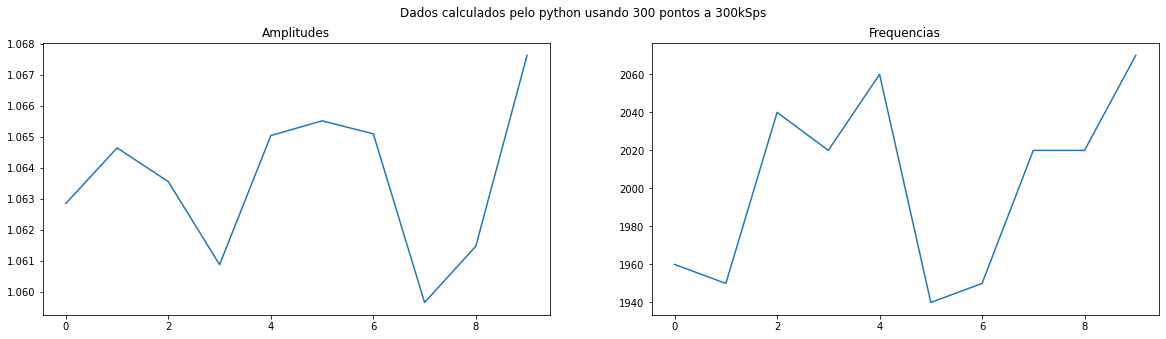

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos a 300kSps')
plt.show()

In [32]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
downsampling = 5
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000/downsampling
    componentes2 = [componente_precisa((dados[frame,:npontos2:downsampling]-np.mean(dados[frame,:npontos2:downsampling]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.063861466517301	1970	1.0637859270617294	1.063861466517301	1.0635972058544314
1	1.0656910609101216	1950	1.0655881596620769	1.0656910609101216	1.0654514146667937
2	1.0616761028347923	2040	1.0615158169323577	1.0616761028347923	1.0614821706614033
3	1.0602924214896936	2010	1.0599510066703168	1.0602924214896936	1.060288585306688
4	1.0643947406437533	2050	1.0641148811260208	1.0643947406437533	1.064313248935311
5	1.0666238467807159	1950	1.066602185560058	1.0666238467807159	1.066302333769293
6	1.064534758786601	1950	1.0643918505897965	1.064534758786601	1.0643359418476996
7	1.0594159799208678	2020	1.0592374031754221	1.0594159799208678	1.0592481453725588
8	1.06050230986288	2020	1.0602774379405184	1.06050230986288	1.0603791524913722
9	1.0681842777125212	2070	1.0680132328283996	1.0681842777125212	1.067983519823105


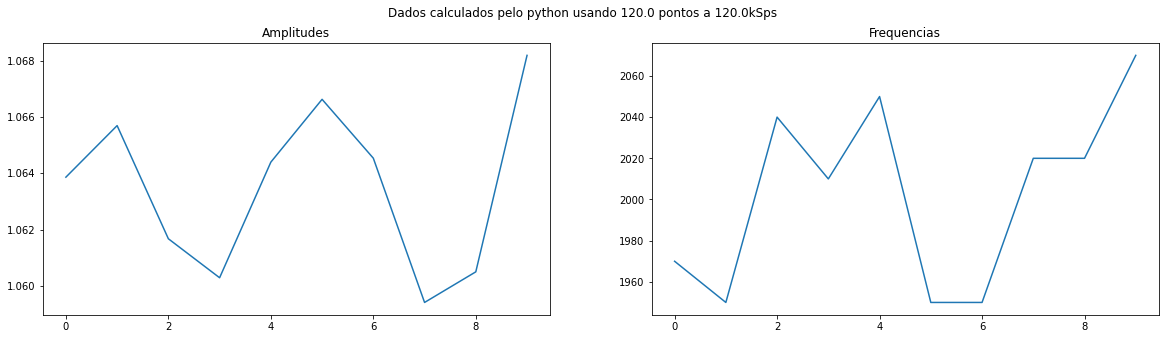

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
freq_usada = sample_freq/1000
npontos_usado = npontos2/downsampling
plt.suptitle(f'Dados calculados pelo python usando {npontos_usado} pontos a {freq_usada}kSps')
plt.show()

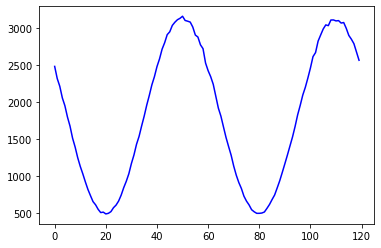

In [34]:
plt.plot(dados[0,:600:downsampling],'b') # amostrado a 300kSps

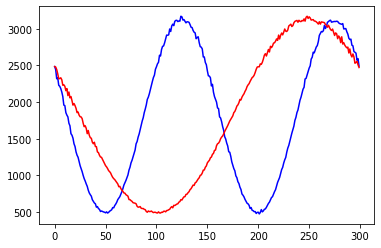

In [35]:
plt.plot(dados[0,:600:2],'b') # amostrado a 300kSps
plt.plot(dados[0,:300],'r') # amostrado a 600kSps